GBSV - Grundlagen Bild und Signal Verarbeitung  
Mini-Challenge 1 - Ägypten   
Si Ben Tran


# Mini-Challenge 1
In dieser Mini-Challenge werden LE1 und LE2 von gbsv geprüft. Jede:r Studierende:r hat eine individualisierte Aufgabenstellung. Die Abgabe soll ebenfalls einzigartig sein. Dazu wird in dieser Mini-Challenge ein Steckbrief über ein Land in Form von Experimenten in Bild- und Signalverarbeitung zusammengestellt. Das heisst, du wählst passend zu deinem gewählten Land (siehe Google Docs) und den dir zugeordneten Aufgaben Bilder und Signale aus. Wenn du z.B. die Schweiz hast, könntest du Löcher in Bildern vom Emmentalerkäse finden. Die Programmiersprache und die Code-Dokumentation darf frei gewählt werden. Sofern nicht anders erwähnt, dürfen vorhandene Bibliotheken verwendet werden. Gebe die Quellen deiner Daten und ggf. deines Codes an. 

Teil der Mini-Challenge ist es, die Abgabe von jemand anderem zu bewerten. 

Abgaben (Termin siehe Spaces): Code, Resultate und Report gemäss Vorlage. Fürs Peer-Grading sollen die Abgaben anonymisiert sein. 
Google Docs: Ländereinschreibung


# 1. Grundlagen Bild- und Signalverarbeitung (LE1)

## 1.1. Bildeigenschaften
Suche verschiedene Bilder unterschiedlicher Szenen passend zu deinem Land oder nehme selbst welche auf. Die Bilder sollen sich eignen, um Anpassungen der Bildeigenschaften {'Wertebereiche von Pixeln, Schärfe, Farbräume (Korrektur oder Transformationen)'} in Experimenten zu demonstrieren. Messe dazu zuerst auf deinen Bildern die dir zugeordneten Bildeigenschaften mittels geeigneten Metriken. Definiere danach ein Ziel, wie die dir zugeordneten Bildeigenschaften verändert werden sollen. Definiere ein paar Experimente, um dieses Ziel zu erreichen, und führe die Experimente mit deinen Bildern und geeigneten Methoden aus. Analysiere die Histogramme der ursprünglichen Bilder und während deinen Experimenten. Führe ggf. eine Histogramm-Entzerrung (Englisch: histogram equalization) durch. Diskutiere deine Daten-, Parameter- und Methodenwahl und die erzielten Ergebnisse. 

In [2]:
# Libraries importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

### Bilder Laden 

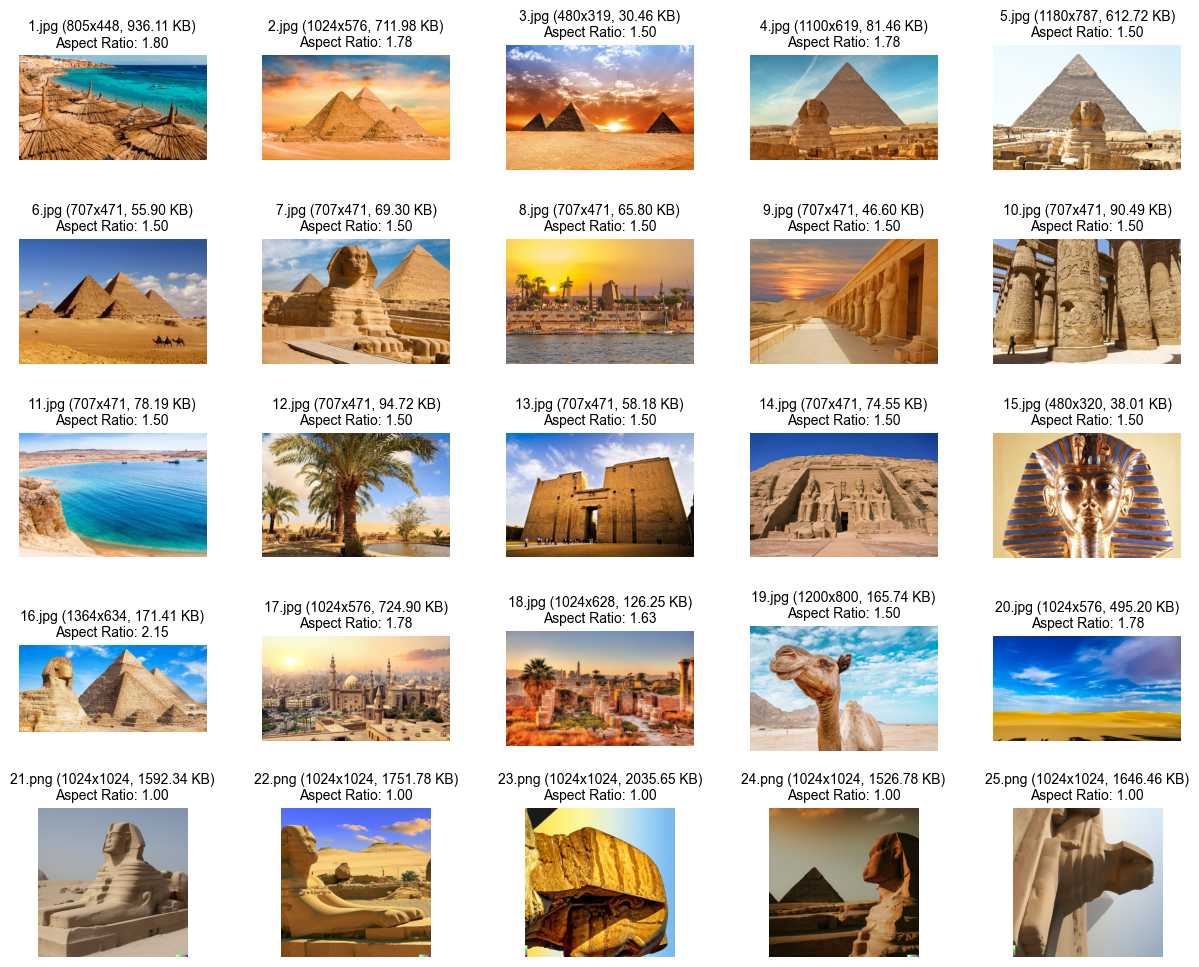

In [3]:
# List of picture filenames
dateinamen = ["1.jpg", "2.jpg", "3.jpg", "4.jpg", "5.jpg", "6.jpg", "7.jpg", "8.jpg", "9.jpg", "10.jpg", "11.jpg", "12.jpg", "13.jpg", "14.jpg", "15.jpg", "16.jpg", "17.jpg", "18.jpg", "19.jpg", "20.jpg", "21.png", "22.png", "23.png", "24.png", "25.png"]

# Create a list to store the images
images = []

# Loop through the filenames and read and store the images in the list
for dateiname in dateinamen:
    # Read the image using PIL
    image = Image.open(f"data/{dateiname}")
    images.append(image)

# Create a 5x5 grid for the subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 12))

# Loop through the images and display them with titles
for i, image in enumerate(images):
    # Get image size in pixels
    width, height = image.size

    # Get file size in kilobytes
    file_size_kb = os.path.getsize(f"data/{dateinamen[i]}") / 1024

    # Calculate aspect ratio
    aspect_ratio = width / height

    # Choose the appropriate subplot for the current image
    ax = axes[i // 5, i % 5]

    # Display the image on the subplot
    ax.imshow(image)
    ax.axis('off')  # Turn off axis labels

    # Create a title with file name, resolution, and file size
    title = f"{dateinamen[i]} ({width}x{height}, {file_size_kb:.2f} KB)"
    
    # Add the aspect ratio on a new line below the title
    title += f"\nAspect Ratio: {aspect_ratio:.2f}"
    ax.set_title(title, fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Set Seaborn style
sns.set_style("whitegrid")

# Show the plot
plt.show()



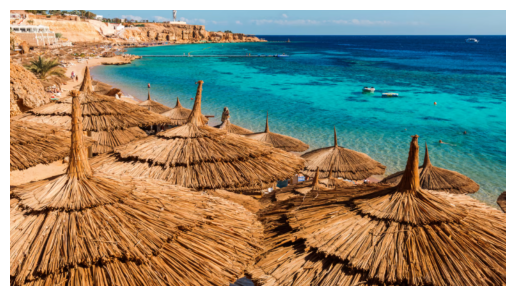

In [8]:
# define function to display images based on index
def show_image(images_list, image_index):
    """
    Display the image at the specified index from the 'images' list.

    Parameters:
    - images_list (list): The list of images to display (as PIL image objects
    - image_index (int): The index of the image to display.

    """
    if 0 <= image_index < len(images_list):
        plt.imshow(images_list[image_index])
        plt.axis("off")
        plt.show()
    else:
        print("Invalid image index. Please provide a valid index.")

# call function
show_image(images, 0)


### Bildeigenschaften

Wertebereiche von Pixeln, Schärfe, Farbräume (Korrektur oder Transformationen)

#### Wertebereiche von Pixeln

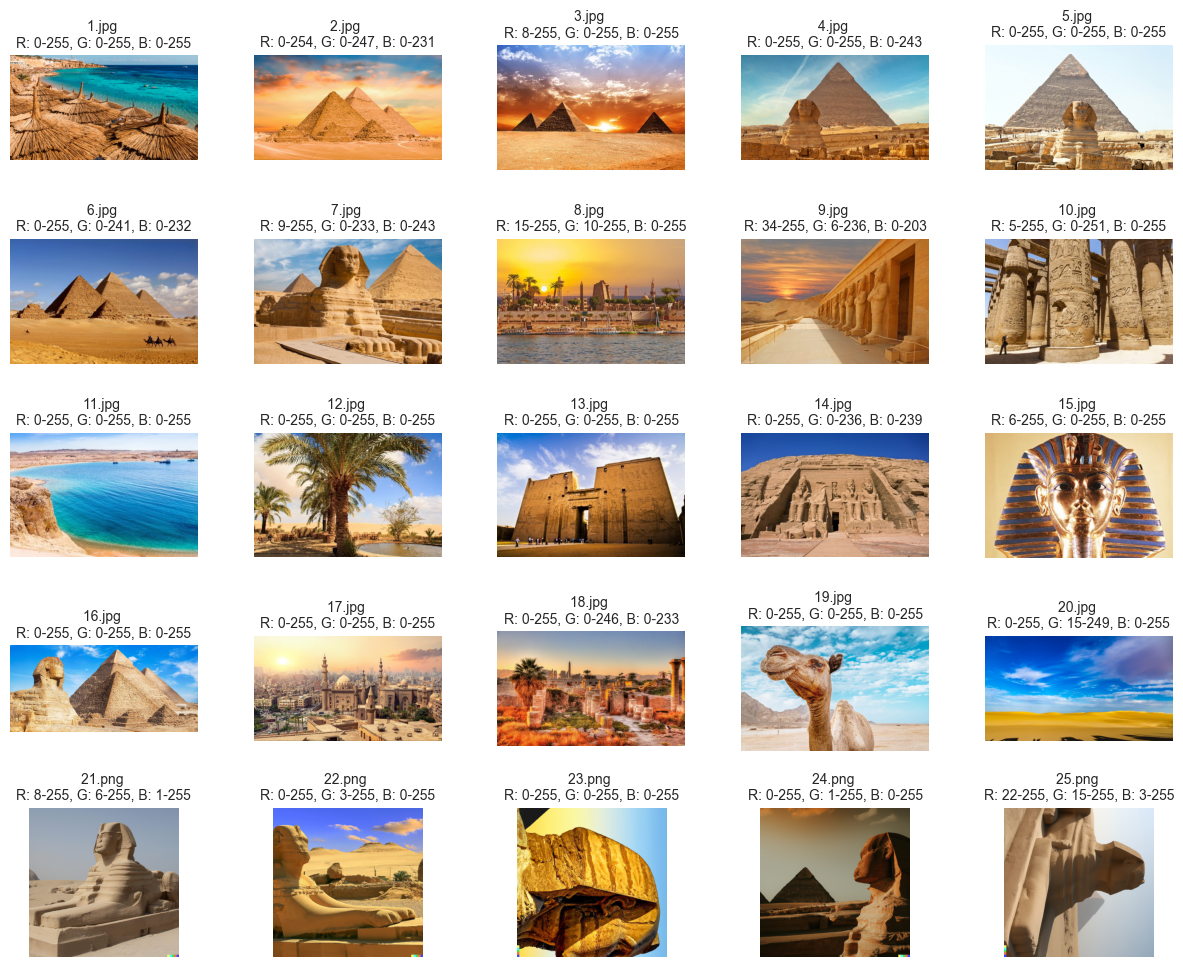

In [13]:
# Create a 5x5 grid for the subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 12))

# Loop through the images and display them with titles
for i, image in enumerate(images):
    
    # Choose the appropriate subplot for the current image
    ax = axes[i // 5, i % 5]

    # Display the image on the subplot
    ax.imshow(image)
    ax.axis('off')  # Turn off axis labels

    # convert every image to numpy array
    image_array = np.array(image)

    # Calculate the value range for each channel (R, G, B)
    min_r, max_r = image_array[:, :, 0].min(), image_array[:, :, 0].max()
    min_g, max_g = image_array[:, :, 1].min(), image_array[:, :, 1].max()
    min_b, max_b = image_array[:, :, 2].min(), image_array[:, :, 2].max()

    # Create a title with file name and RGB values ranges
    title = f"{dateinamen[i]} \nR: {min_r}-{max_r}, G: {min_g}-{max_g}, B: {min_b}-{max_b}"
    ax.set_title(title, fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Set Seaborn style
sns.set_style("whitegrid")

# Show the plot
plt.show()


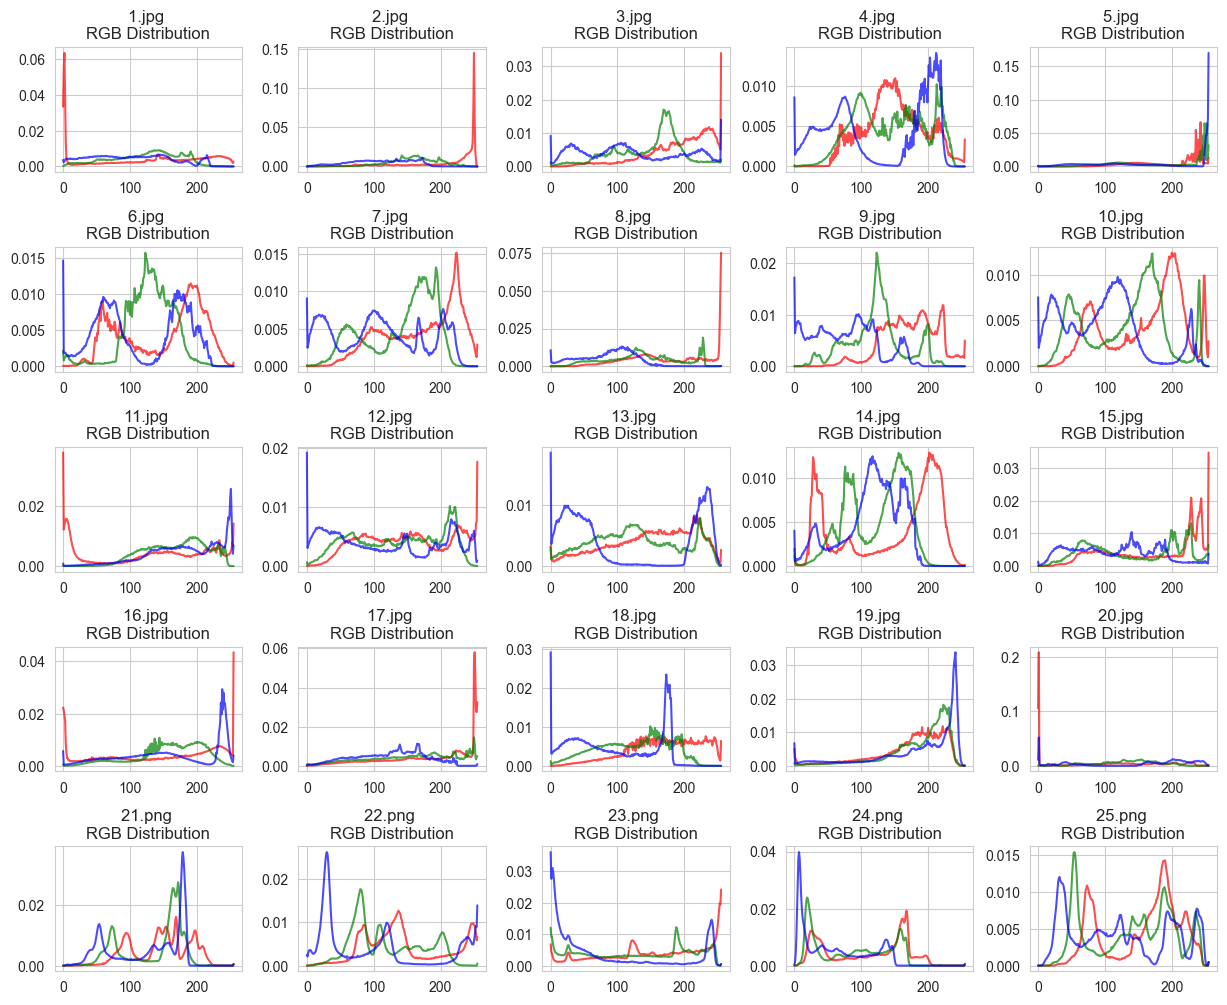

In [14]:
# Create a 5x5 grid for the subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 12))

# Loop through the images and plot the RGB distributions
for i, image in enumerate(images):

    # Choose the appropriate subplot for the current image
    ax = axes[i // 5, i % 5]

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Calculate the RGB histograms
    hist_r, bins_r = np.histogram(image_array[:, :, 0], bins=256, range=(0, 256))
    hist_g, bins_g = np.histogram(image_array[:, :, 1], bins=256, range=(0, 256))
    hist_b, bins_b = np.histogram(image_array[:, :, 2], bins=256, range=(0, 256))

    # Normalize the histograms
    hist_r = hist_r / hist_r.sum()
    hist_g = hist_g / hist_g.sum()
    hist_b = hist_b / hist_b.sum()

    # Plot the RGB histograms
    ax.plot(bins_r[:-1], hist_r, color='red', alpha=0.7, label='R')
    ax.plot(bins_g[:-1], hist_g, color='green', alpha=0.7, label='G')
    ax.plot(bins_b[:-1], hist_b, color='blue', alpha=0.7, label='B')
    ax.set_title(f'{dateinamen[i]} \nRGB Distribution')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.6)

# Set Seaborn style
plt.show()


#### Schärfe

Um es einfacher zu machen, nehmen wir ein Bild und überprüfen seine Schärfe. Ausserdem haben wir verschiedene Versionen desselben Bildes mit unterschiedlichen Schärfeneinstellungen erstellt. Das Bild, das wir verwenden, zeigt die Pyramide von Gizeh und hat den Dateinamen "6.jpg".


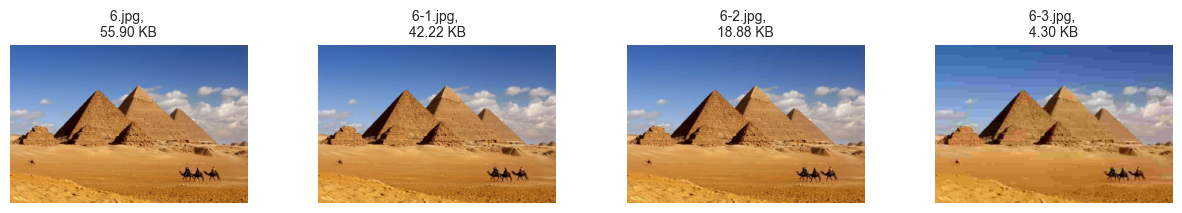

In [44]:
# Define list of filenames
dateiname_schaerfe = ["6.jpg", "6-1.jpg", "6-2.jpg", "6-3.jpg"]

# Create a list to store the images
images_schaerfe = []

# Loop through the filenames and read and store the images in the list
for file in dateiname_schaerfe:
    # Read the image using PIL
    image = Image.open(f"data/schaerfe/{file}")
    images_schaerfe.append(image)  # Append to the correct list

# Create a 1x4 grid for the subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 4))  # Changed figsize height to 4

# Loop through the images and display them with titles
for i, image in enumerate(images_schaerfe):
    # Get image size in pixels
    width, height = image.size

    # Get file size in kilobytes
    file_size_kb = os.path.getsize(f"data/schaerfe/{dateiname_schaerfe[i]}") / 1024
    
    # Display the image on the subplot
    ax = axes[i]  # Get the correct axis
    ax.imshow(image)
    ax.axis('off')  # Turn off axis labels

    # Create a title with file name, resolution, and file size
    title = f"{dateiname_schaerfe[i]}, \n{file_size_kb:.2f} KB"
    ax.set_title(title, fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Set Seaborn style
sns.set_style("whitegrid")

# Show the plot
plt.show()


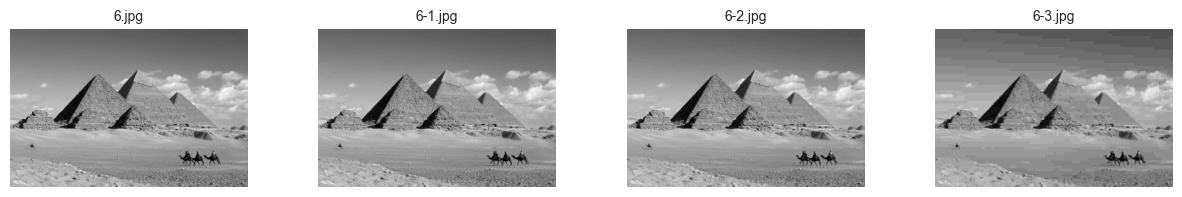

In [45]:
# Initialize lists to store statistical values for each image
min_values = []
max_values = []
std_deviation = []
mean_values = []
median_values = []
variance_values = []

# Create a 1x4 grid for the subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# Loop through the images
for i, image in enumerate(images_schaerfe):
    # Convert the image to grayscale
    grayscale_image = image.convert("L")

    # Convert grayscale image to NumPy array for visualization
    grayscale_array = np.array(grayscale_image)

    # Calculate and append the statistical values
    min_values.append(np.min(grayscale_array))
    max_values.append(np.max(grayscale_array))
    std_deviation.append(np.std(grayscale_array))
    mean_values.append(np.mean(grayscale_array))
    median_values.append(np.median(grayscale_array))
    variance_values.append(np.var(grayscale_array))  # Calculate variance

    # Display the grayscale image on the subplot
    ax = axes[i]
    ax.imshow(grayscale_array, cmap='gray')  # Use a grayscale colormap
    ax.axis('off')  # Turn off axis labels
    ax.set_title(f"{dateiname_schaerfe[i]}", fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the grayscale images
plt.show()



C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_11872\3570899829.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filenames, rotation=45, fontsize=8)
C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_11872\3570899829.py:30: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(y_min, y_max)


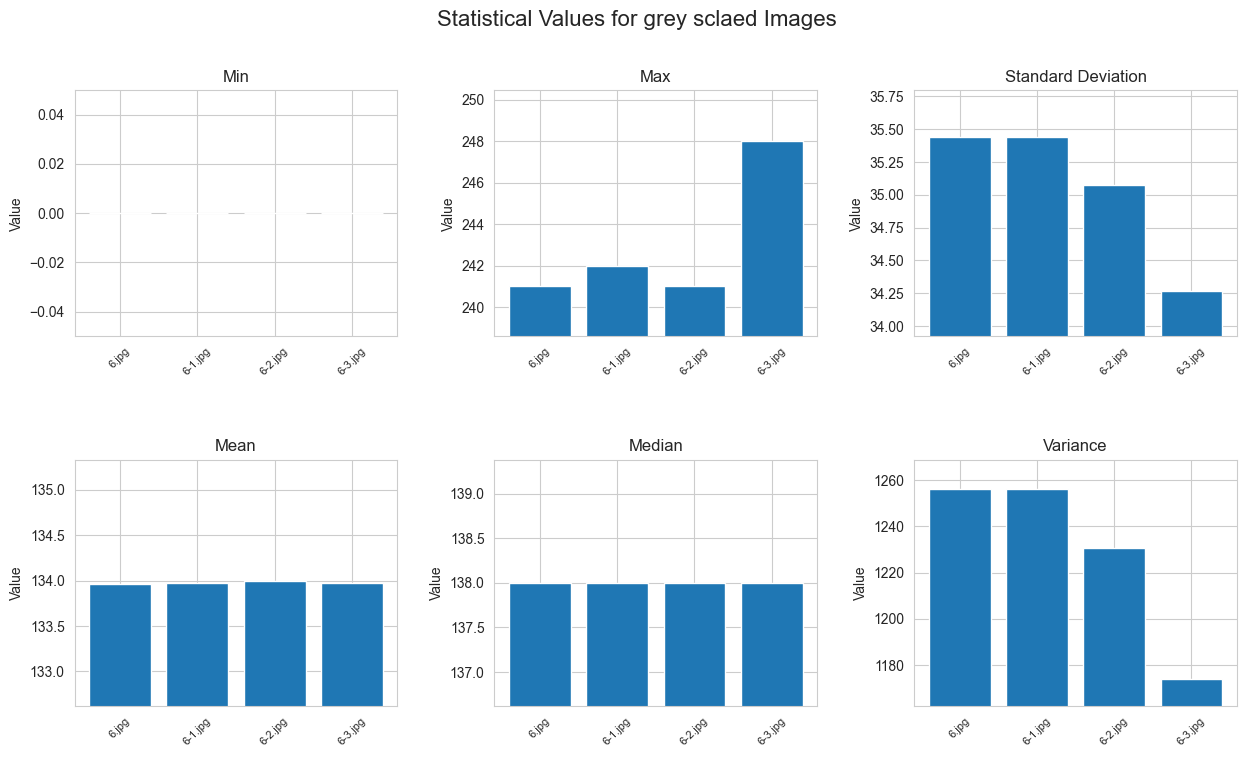

In [49]:
# Define the filenames
filenames = dateiname_schaerfe

# Create subplots for each statistical value
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Statistical Values for grey sclaed Images', fontsize=16)

# List of statistical values and their corresponding data
statistical_values = [
    ("Min", min_values),
    ("Max", max_values),
    ("Standard Deviation", std_deviation),
    ("Mean", mean_values),
    ("Median", median_values),
    ("Variance", variance_values)
]

# Loop through each statistical value and create a bar plot with adaptive y-axis scaling
for i, (stat_name, stat_data) in enumerate(statistical_values):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.bar(filenames, stat_data)
    ax.set_title(stat_name)
    ax.set_xticklabels(filenames, rotation=45, fontsize=8)
    ax.set_ylabel("Value")
    
    # Set y-axis scaling based on statistical values
    y_min = min(stat_data) - 0.01 * abs(min(stat_data))  # Adjust for visibility
    y_max = max(stat_data) + 0.01 * abs(max(stat_data))  # Adjust for visibility
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plots
plt.show()


#### Farbräume

In [ ]:

# Schritt 3: Definition des Ziels
# Leg fest, wie du die Bildeigenschaften ändern möchtest. Zum Beispiel die Erhöhung des Kontrasts.

# Schritt 4: Durchführung der Experimente
# Hier kannst du verschiedene Methoden anwenden, um das Ziel zu erreichen.
# Beispiel: Kontrastverstärkung, Farbtransformation, Schärfung, Histogramm-Equalization, usw.

# Schritt 5: Analyse der Histogramme
# Verwende die OpenCV-Funktionen, um die Histogramme der Bilder zu analysieren.

# Schritt 6: Histogramm-Entzerrung (falls erforderlich)
# Du kannst die Histogramm-Entzerrung verwenden, um die Bildqualität zu verbessern.

# Schritt 7: Diskussion
# Diskutiere die Auswahl der Daten, Parameter und Methoden sowie die erzielten Ergebnisse.

# Schritt 8: Ergebnisse visualisieren (optional)
# Zeige die Originalbilder und die bearbeiteten Bilder, um die Unterschiede zu verdeutlichen.

# Schritt 9: Speichern der Ergebnisse (optional)
# Du kannst die bearbeiteten Bilder speichern, wenn gewünscht.

# Schritt 10: Abschlussbemerkungen (optional)
# Füge hier zusätzliche Bemerkungen oder Erkenntnisse hinzu.

# Das ist eine grundlegende Vorlage für dein Projekt. Du kannst sie an deine spezifischen Anforderungen anpassen.

## 1.2. Signaleigenschaften
Suche verschiedene Signale unterschiedlicher Szenen passend zu deinem Land oder nehme selbst welche auf. Die Signale sollen sich eignen, um Anpassungen der Signaleigenschaften {'Bandbreite, Phase, Rauschen'} in Experimenten zu demonstrieren. Messe dazu zuerst auf deinen Signalen die dir zugeordneten Signaleigenschaften mittels geeigneten Metriken. Definiere danach ein Ziel, wie die dir zugeordneten Signaleigenschaften verändert werden sollen. Definiere ein paar Experimente, um dieses Ziel zu erreichen, und führe die Experimente mit deinen Signalen und geeigneten Methoden aus. Demonstriere mit deinen aufgenommenen Signale das Nyquist Theorem. Diskutiere deine Daten-, Parameter- und Methodenwahl und die erzielten Ergebnisse. 

## 1.3. Normalisierung und Standardisierung
Normalisiere und standardisiere deine Bild- und Signaldaten. Demonstriere, dass die Daten nach der Normalisierung/Standardisierung weiterhin den gleichen Inhalt zeigen. Diskutiere deine Methodenwahl und die erzielten Ergebnisse

# 2. Faltung/Filterung in Bild und Signal (LE2)

## 2.1. Filterung in der räumlichen Domäne
Implementiere selbst einen klassischen Algorithmus zur Filterung von Signalen (1D) und Bildern (2D) in der räumlichen Domäne (Faltung/Convolution). Welche Elemente soll ein solcher Algorithmus enthalten? Teste deine Funktion mit jeweils einem Signal und einem Bild passend zu deinem Land und zwei Faltungskernels in geeigneter Grösse. Die beiden Faltungskernel sollen das Signal bzw. Bild {'weichzeichnen, entrauschen'}. Skaliert dein Algorithmus für grosse Daten? Messe die Unterschiede deiner Beispielsignale/-bilder vor und nach dem Filtern mittels einer geeigneten Metrik. Diskutiere deine Daten-, Methoden- und Parameterwahl sowie die erzielten Ergebnisse. Weshalb hast du diese Faltungskernel bzw. diese Metrik gewählt? 


## 2.2. Filterung in der spektralen Domäne
Implementiere eine Methode basierend auf spektraler Filterung, welche ein repetitives Muster aus einem Signal bzw. einem Bild filtert. Die Methode soll für Signale (1D) sowie Bilder (2D) funktionieren. Demonstriere das Resultat anhand eines Signales und eines Bildes passend zu deinem Land. Diskutiere deine Daten-, Methoden- und Parameterwahl sowie die erzielten Ergebnisse. 

## 2.3. Bonus: Filterung in der räumlichen und spektralen Domäne
Führe optional Experimente mit Signalen oder Bildern mit Methoden durch, welche das Filtern in der räumlichen und der spektralen Domäne ermöglichen. Z.B. mittels Wavelets. Diskutiere deine Daten-, Parameter- und Methodenwahl und die erzielten Ergebnisse.

## 2.4. Algorithmen zur Erkennung von Strukturen in Bildern
Zeige die einzelnen Schritte eines bekannten klassischen Bildverarbeitungs-Algorithmus zur Detektion von {'Kreisen'} in einem geeigneten Beispielbild deines Landes. Die einzelnen Schritte können selbst programmiert sein oder von Bibliotheken verwendet werden. Wichtig ist, dass Zwischenergebnisse der Schritte ersichtlich sind. Beschreibe zudem, was in jedem einzelnen Schritt konzeptionell relevant ist. Diskutiere deine Daten-, Methoden- und Parameterwahl sowie die erzielten Ergebnisse. Für welche Fälle funktioniert dein Algorithmus gut bzw. schlecht? Warum hast du dieses Bild gewählt?

# 3. Peer-Grading
Nach Abgabe der Mini-Challenge hast du 1 Woche Zeit eine dir zugeordnete Abgabe von anderen zu bewerten. Die Zuordnung erfolgt via FHNW Peer-Grading-Tool (siehe Link unten). Orientiere dich für die Bewertung an den vorgegebenen Bewertungskriterien (siehe Excel-Datei oder Peer-Grading-Tool). Die Note 5 bedeutet, dass alles erfüllt ist, wie du es von einem guten Data Scientist in der Praxis erwarten würdest. Du startest als Baseline mit der Note 5. Entdeckst du Fehler, geht die Note nach unten. Der Note 5.5 nähert man sich, wenn die Erwartungen übertroffen wurden. Der Note 6 nähert man sich, wenn die Leistung ausserordentlich oder mit einer unglaublichen Eigenleistung verbunden ist bzw. es gar nicht mehr besser geht. Kritisches Denken, Vielfalt von Experimenten und eigene Ideen werden positiv bewertet. Siehe auch Checkliste für Bewertung. Die Benotung soll auf Zehntel gerundet sein. Wer auf Zehntel gerundet mit 0.1 Abweichung die Endnote von der Fachexpertin trifft, kriegt einen Bonus von 0.2 Noten für die eigene Abgabe. In der Sprechstunde vom 7. November widmen wir uns dem Peer-Grading. 
FHNW Peer-Grading-Tool
